In [43]:
import dataloader
import utils
import linear

import datetime
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

%load_ext autoreload
%autoreload 2

# Model Data range
date = datetime.datetime(2021,3,12)
# Total entry count
count = 1200
training_count = 1000

history_size = 60


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# AMZN

In [45]:
path = "./Data/AMZN2021.csv"
# Load data, with yesterday close price.
train_x0, train_y0, test_x0, test_y0 = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)
train_x0 = np.resize(train_x0, (training_count - history_size, history_size))
test_x0 = np.resize(test_x0, (count - training_count, history_size))
train_x1 = np.hstack((train_x0, train_x0))
test_x1 = np.hstack((test_x0, test_x0))
print(train_x0.shape)
print(test_x0.shape)


(1243, 8)
(1243, 8)
(1242, 8)
(1242, 8)
(1200, 8)
(940, 60, 1)
(200, 60, 1)
(940, 60)
(200, 60)


In [46]:
path = "./Data/AMZN2021.csv"
date = datetime.datetime(2021,3,13)
# Load data, with today close price as ground truth.
_, train_y, _, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(1200, 8)
(940, 60, 1)
(200, 60, 1)


In [47]:

ALPHAS = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]  # Model Smooth Constant
regressor, best_err = linear.linear_regression_model_selection(train_x1, train_y, ALPHAS)

1e-06 mean val RMSE: 0.01409261085750987
Time lapsed 11.182546615600586
1e-05 mean val RMSE: 0.014092398262496402
Time lapsed 7.965087890625
0.0001 mean val RMSE: 0.014090284197321798
Time lapsed 7.694244384765625
0.001 mean val RMSE: 0.014070271373930266
Time lapsed 7.636547088623047
0.01 mean val RMSE: 0.013944085221323416
Time lapsed 7.651567459106445
0.1 mean val RMSE: 0.013977539715874274
Time lapsed 7.652521133422852
1 mean val RMSE: 0.016397039629553967
Time lapsed 8.331775665283203


/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005751388690041201, tolerance: 0.0019465612113910094
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023070067717202665, tolerance: 0.0021643900884798584
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.037709415107216676, tolerance: 0.002091122593254712
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/li

1e-06 mean val RMSE: 0.013841139964958265
Time lapsed 337.02731132507324


/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006001958547094732, tolerance: 0.0021643900884798584
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006141753554996507, tolerance: 0.002091122593254712
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005401111774259532, tolerance: 0.0016827267286467498
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/li

1e-05 mean val RMSE: 0.013576602188580717
Time lapsed 256.4816474914551
0.0001 mean val RMSE: 0.013460445474088676
Time lapsed 179.443359375
0.001 mean val RMSE: 0.01736555879311808
Time lapsed 162.81366348266602
0.01 mean val RMSE: 0.08820037596471145
Time lapsed 61.94448471069336
0.1 mean val RMSE: 0.1881917254473004
Time lapsed 8.060216903686523
1 mean val RMSE: 0.1881917254473004
Time lapsed 8.16202163696289


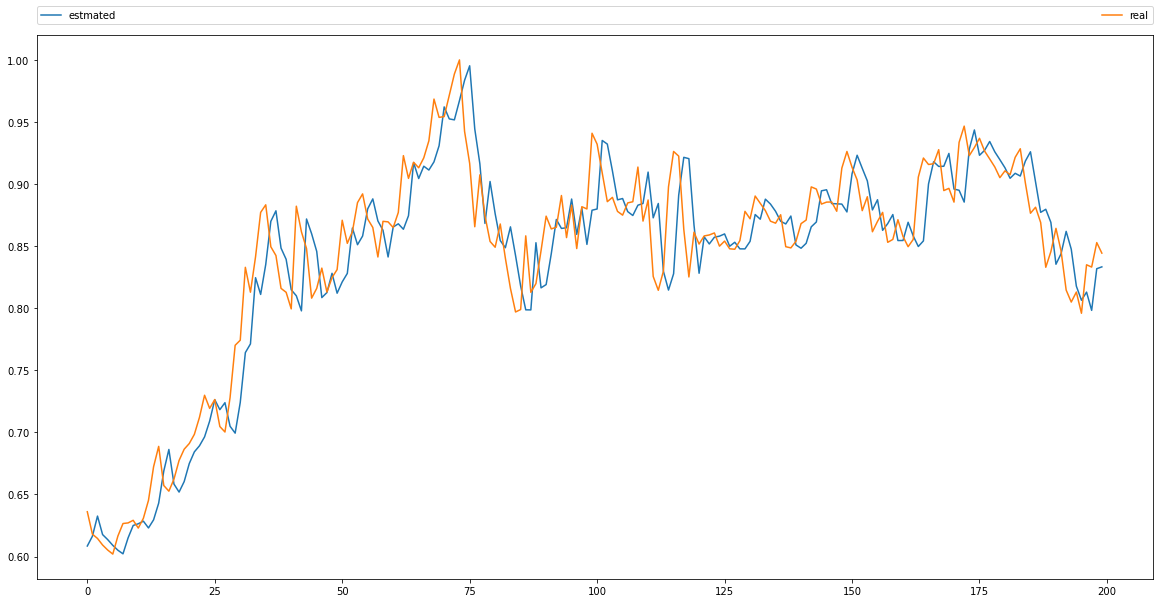

In [48]:
y_hat = regressor.fit(train_x1, train_y).predict(test_x1)
plt.plot(y_hat[:], label="estmated")
plt.plot(test_y[:], label="real")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [49]:
print("MAE:  ", utils.mae(y_hat, test_y))
print("RMSE: ", utils.rmse(y_hat, test_y))

MAE:   0.02399462774472461
RMSE:  0.031305118542039496


# SONY

In [50]:
path = "./Data/SONY2021.csv"
# Load data, with yesterday close price.
train_x0, train_y0, test_x0, test_y0 = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)
train_x0 = np.resize(train_x0, (training_count - history_size, history_size))
test_x0 = np.resize(test_x0, (count - training_count, history_size))
train_x1 = np.hstack((train_x0, train_x0))
test_x1 = np.hstack((test_x0, test_x0))
print(train_x0.shape)
print(test_x0.shape)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(1200, 8)
(940, 60, 1)
(200, 60, 1)
(940, 60)
(200, 60)


In [51]:
path = "./Data/SONY2021.csv"
date = datetime.datetime(2021,3,13)
# Load data, with today close price as ground truth.
_, train_y, _, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(1200, 8)
(940, 60, 1)
(200, 60, 1)


In [52]:

ALPHAS = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]  # Model Smooth Constant
regressor, best_err = linear.linear_regression_model_selection(train_x1, train_y, ALPHAS)

1e-06 mean val RMSE: 0.010175934422076923
Time lapsed 8.864641189575195
1e-05 mean val RMSE: 0.010175674953881659
Time lapsed 7.99250602722168
0.0001 mean val RMSE: 0.010173095169865797
Time lapsed 7.722139358520508
0.001 mean val RMSE: 0.010148721301998852
Time lapsed 8.12530517578125
0.01 mean val RMSE: 0.010002559200561957
Time lapsed 7.863044738769531
0.1 mean val RMSE: 0.01026089624364396
Time lapsed 7.854461669921875
1 mean val RMSE: 0.01345580496212237
Time lapsed 8.316993713378906


/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016715505363657027, tolerance: 0.0012695076827755661
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004342278160473258, tolerance: 0.0013315648230747264
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005223343973495567, tolerance: 0.001379494817436703
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/l

1e-06 mean val RMSE: 0.009871961841602012
Time lapsed 320.4307556152344


/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004039368135338034, tolerance: 0.0012695076827755661
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004194093497875237, tolerance: 0.0013315648230747264
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004617150339218355, tolerance: 0.001379494817436703
  model = cd_fast.enet_coordinate_descent(


1e-05 mean val RMSE: 0.009756084598995195
Time lapsed 241.5609359741211
0.0001 mean val RMSE: 0.009822298419153047
Time lapsed 136.98267936706543


/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003834979637001773, tolerance: 0.0014222436058877507
  model = cd_fast.enet_coordinate_descent(


0.001 mean val RMSE: 0.01693279824537646
Time lapsed 119.2476749420166
0.01 mean val RMSE: 0.11322749241886254
Time lapsed 33.90312194824219
0.1 mean val RMSE: 0.1317856320112356
Time lapsed 8.095026016235352
1 mean val RMSE: 0.1317856320112356
Time lapsed 8.149862289428711


/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003834979637001773, tolerance: 0.0014222436058877507
  model = cd_fast.enet_coordinate_descent(


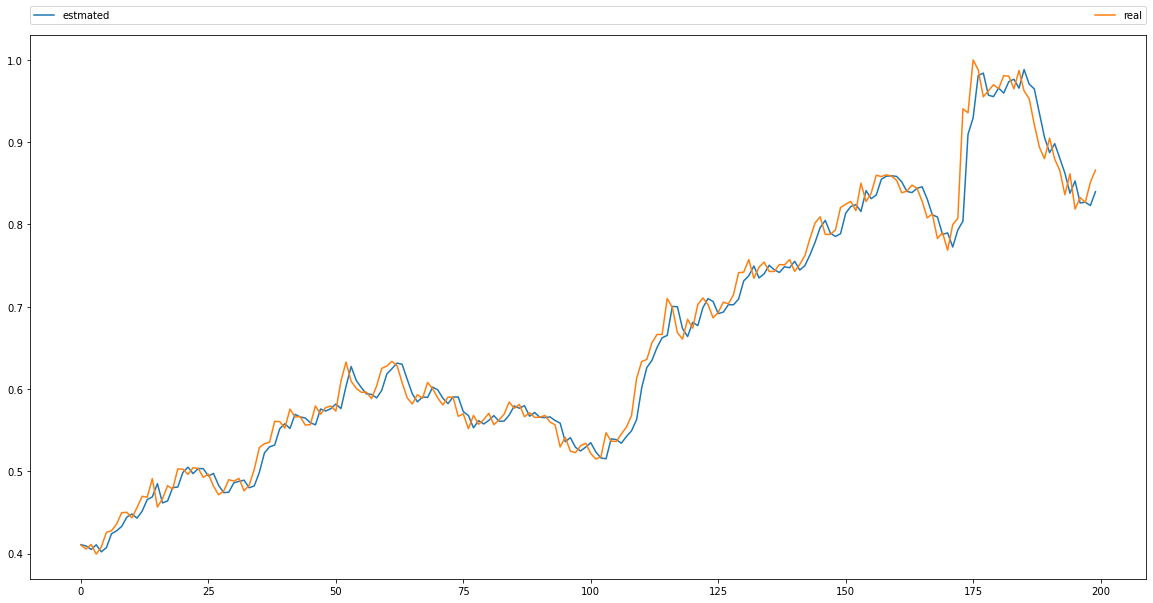

In [53]:
y_hat = regressor.fit(train_x1, train_y).predict(test_x1)
plt.plot(y_hat[:], label="estmated")
plt.plot(test_y[:], label="real")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [54]:
print("MAE:  ", utils.mae(y_hat, test_y))
print("RMSE: ", utils.rmse(y_hat, test_y))

MAE:   0.013565363911623447
RMSE:  0.019450874523383302


In [55]:
# IBIO

In [56]:
path = "./Data/IBIO2021.csv"
# Load data, with yesterday close price.
train_x0, train_y0, test_x0, test_y0 = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)
train_x0 = np.resize(train_x0, (training_count - history_size, history_size))
test_x0 = np.resize(test_x0, (count - training_count, history_size))
train_x1 = np.hstack((train_x0, train_x0))
test_x1 = np.hstack((test_x0, test_x0))
print(train_x0.shape)
print(test_x0.shape)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(1200, 8)
(940, 60, 1)
(200, 60, 1)
(940, 60)
(200, 60)


In [57]:
path = "./Data/IBIO2021.csv"
date = datetime.datetime(2021,3,13)
# Load data, with today close price as ground truth.
_, train_y, _, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(1200, 8)
(940, 60, 1)
(200, 60, 1)


In [58]:

ALPHAS = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]  # Model Smooth Constant
regressor, best_err = linear.linear_regression_model_selection(train_x1, train_y, ALPHAS)

1e-06 mean val RMSE: 0.019031111582182098
Time lapsed 8.647441864013672
1e-05 mean val RMSE: 0.019030970093477047
Time lapsed 8.023738861083984
0.0001 mean val RMSE: 0.019029557151606657
Time lapsed 9.60683822631836
0.001 mean val RMSE: 0.01901561992445282
Time lapsed 9.53054428100586
0.01 mean val RMSE: 0.018893399890133535
Time lapsed 9.546995162963867
0.1 mean val RMSE: 0.018458464523034877
Time lapsed 9.538888931274414
1 mean val RMSE: 0.02000847153278952
Time lapsed 9.542703628540039


/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05618089425150973, tolerance: 0.0043194848752150265
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.055772256790418306, tolerance: 0.00446090302672457
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023039619779519183, tolerance: 0.004119721468000271
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/p

1e-06 mean val RMSE: 0.018804084275954307
Time lapsed 335.88290214538574


/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005845733012324383, tolerance: 0.004119721468000271
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0059409140294784946, tolerance: 0.0038494951559743616
  model = cd_fast.enet_coordinate_descent(
/home/will/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007067478692885432, tolerance: 0.004842602413542274
  model = cd_fast.enet_coordinate_descent(


1e-05 mean val RMSE: 0.017967586657906084
Time lapsed 275.65860748291016
0.0001 mean val RMSE: 0.017730171655074088
Time lapsed 184.19766426086426
0.001 mean val RMSE: 0.02015380378294717
Time lapsed 132.82155990600586
0.01 mean val RMSE: 0.07891760280063602
Time lapsed 111.44614219665527
0.1 mean val RMSE: 0.2540596730683671
Time lapsed 8.268594741821289
1 mean val RMSE: 0.2540596730683671
Time lapsed 8.149147033691406


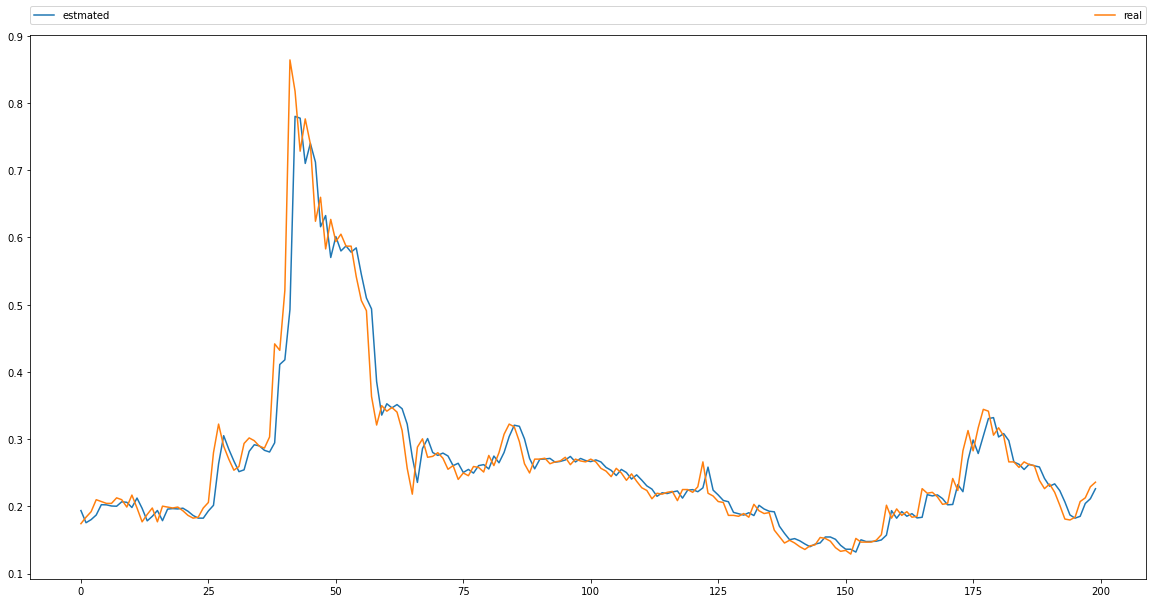

In [59]:
y_hat = regressor.fit(train_x1, train_y).predict(test_x1)
plt.plot(y_hat[:], label="estmated")
plt.plot(test_y[:], label="real")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [60]:
print("MAE:  ", utils.mae(y_hat, test_y))
print("RMSE: ", utils.rmse(y_hat, test_y))

MAE:   0.01841157972277486
RMSE:  0.03761423008869282


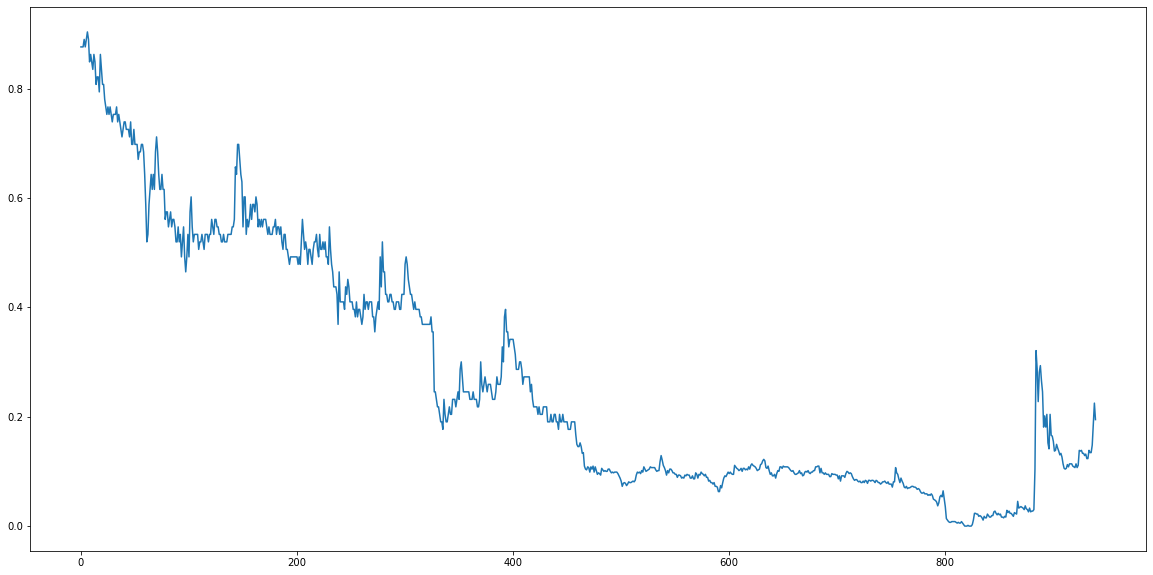

In [61]:
plt.plot(train_y[:])